In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()

# Convert it to a DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target labels (wine classes)
df['target'] = wine.target

# Display first 5 rows
print(df.head())

# Check dataset shape
print("Dataset shape:", df.shape)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features (excluding target)
X = df.drop(columns=['target'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easy viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=wine.feature_names)

# Display first few rows
print(X_scaled_df.head())


    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)  # Reduce to 3 components
X_pca = pca.fit_transform(X_scaled)

# Display explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Display cumulative variance
print("Cumulative Variance Explained:", np.cumsum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.36198848 0.1920749  0.11123631]
Cumulative Variance Explained: [0.36198848 0.55406338 0.66529969]


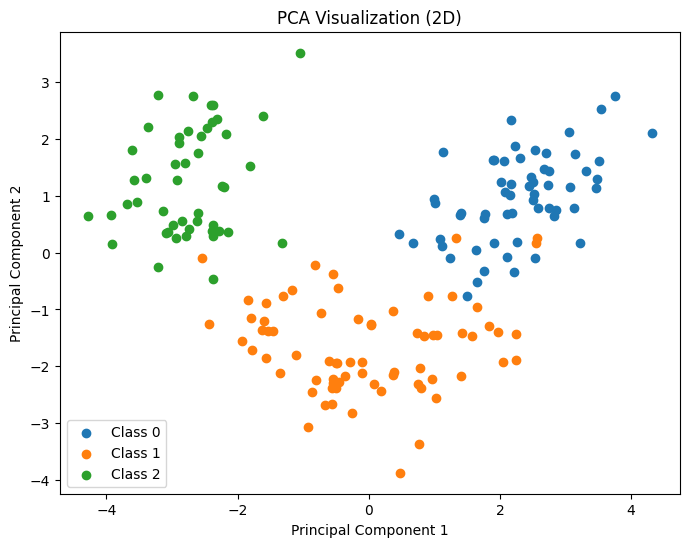

In [ ]:
import matplotlib.pyplot as plt

# Convert PCA result to DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['target'] = df['target']

# 2D Scatter Plot
plt.figure(figsize=(8,6))
for label in df_pca['target'].unique():
    subset = df_pca[df_pca['target'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (2D)')
plt.legend()
plt.show()


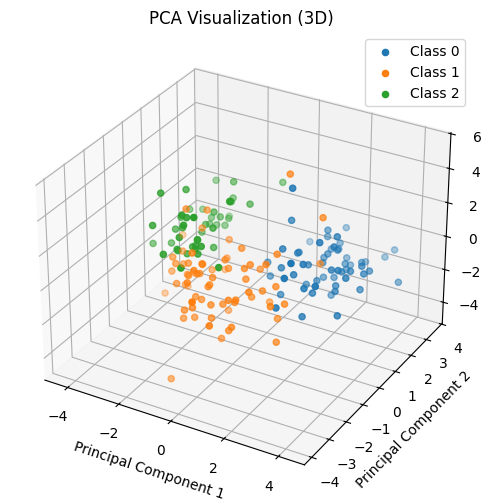

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for label in df_pca['target'].unique():
    subset = df_pca[df_pca['target'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=f'Class {label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization (3D)')
ax.legend()
plt.show()
